### Checking Variance Calculations ###

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [240]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mesh = mesh.rename_dims({'z': 'depth', 'x': 'gridX', 'y' : 'gridY'})

In [46]:
biol = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_month_variance_biology__20150101_20150131.nc')
biol_mean = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20150101_20150131.nc')
biol_ts = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_timeseries_biology_20150101_20150131.nc')

0.009538564
1.3671067e-05


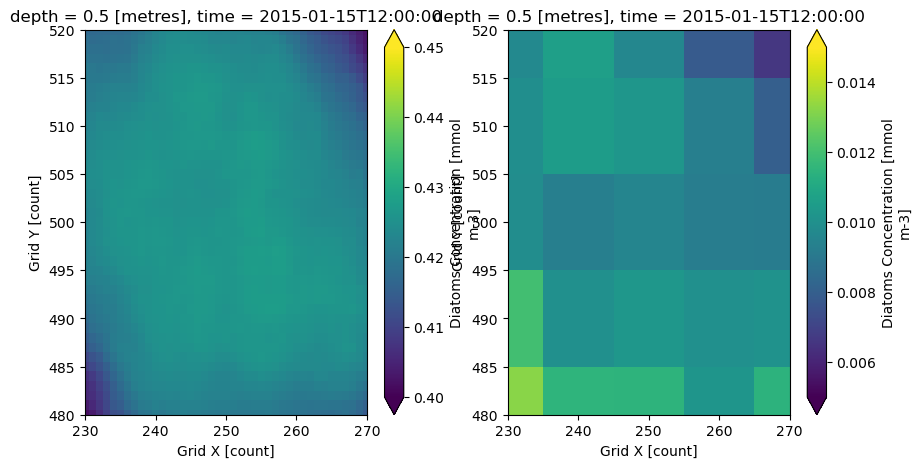

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
biol_mean.diatoms[0, 0].plot(ax=axs[0], vmax=0.45, vmin=0.4)
biol.diatoms[0, 0].plot(ax=axs[1], vmax=0.015, vmin=0.005);
for ax in axs:
    ax.set_ylim(480, 520)
    ax.set_xlim(230, 270)
print (biol.diatoms[0, 0, 50, 25].values)
print (biol_mean.diatoms[0, 0, 480:520, 230:270].var().values)

0.00953857


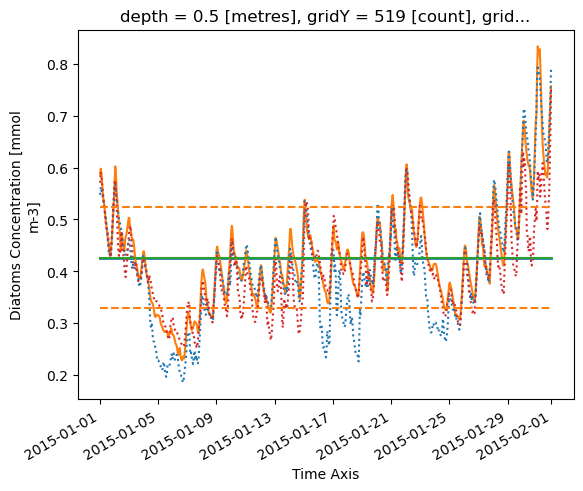

In [83]:
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], biol_mean.diatoms[0, 0, 500, 250].mean().values * np.ones((2)), linewidth=2)
biol_ts.diatoms[:, 0, 20, 20].plot();
biol_ts.diatoms[:, 0, 0, 0].plot(linestyle=':', c='tab:blue');
biol_ts.diatoms[:, 0, 39, 39].plot(linestyle=':', c='tab:red');
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], biol_ts.diatoms[:, 0, 20, 20].mean().values * np.ones((2)))
variance = biol_ts.diatoms[:, 0, 20, 20].var().values
print (variance)
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], (biol_ts.diatoms[:, 0, 20, 20].mean().values
                                                             + np.sqrt(variance))* np.ones((2)), '--', c='tab:orange')
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], (biol_ts.diatoms[:, 0, 20, 20].mean().values
                                                             - np.sqrt(variance))* np.ones((2)), '--', c='tab:orange');

In [163]:
zvars =  biol_ts.diatoms[:, 0].values.var() # total variance
var_through_time = biol_ts.diatoms[:, 0].var(axis=0)  # variance through time
mean_var_through_time = var_through_time.mean()
time_means = biol_ts.diatoms[:, 0].mean(axis=0)
variance_time_means = time_means.values.var()

In [165]:
print (f'total variance = {zvars}')
print (f'time variance = {mean_var_through_time.values}') # variance in time, averaged over space
print (f'time variance (coarse) = {biol.diatoms[0, 0, 48:53, 23:28].mean().values}') # variance in time, averaged over space
print (f'space variance = {variance_time_means}') # averaged over time, variance over space
print (f'space variance (from month file) = {biol_mean.diatoms[0, 0, 480:520, 230:270].values.flatten().var()}') # variance in space, averaged over time
print (f'total variance as sum = {(mean_var_through_time.values + variance_time_means)}')

total variance = 0.009963304735720158
time variance = 0.009949633851647377
time variance (coarse) = 0.009974590502679348
space variance = 1.3671135093318298e-05
space variance (from month file) = 1.3671066881215665e-05
total variance as sum = 0.009963304735720158


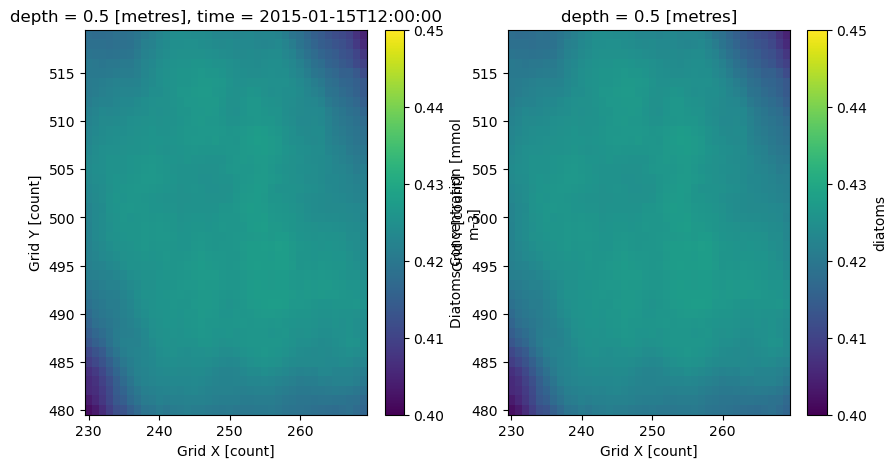

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
biol_mean.diatoms[0, 0, 480:520, 230:270].plot(ax=axs[0], vmax=0.45, vmin=0.4)
(biol_ts.diatoms[:, 0].mean(axis=0)).plot(ax=axs[1], vmax=0.45, vmin=0.4)

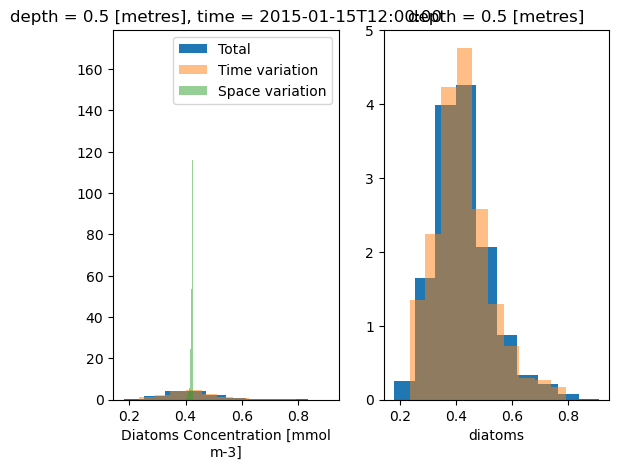

In [168]:
fig, axs = plt.subplots(1, 2)
for ax in axs:
    biol_ts.diatoms[:, 0].plot(ax=ax, density=True, label='Total');  # total distribution
    biol_ts.diatoms[:, 0].mean(axis=2).mean(axis=1).plot.hist(ax=ax, density=True, alpha=0.5, label='Time variation'); # variation in the space means across time
    
biol_mean.diatoms[0, 0, 480:520, 230:270].plot.hist(ax=axs[0], density=True, alpha=0.5, label='Space variation'); # variation in the temporal means across space
axs[0].legend();

### Now Check Variance if I sum over depths ###

In [169]:
time_series = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_timeseries_fd_biology_20150101_20150131.nc')
time_series

<xarray.Dataset>
Dimensions:           (time: 744, depth: 40, gridY: 50, gridX: 50)
Coordinates:
  * time              (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-3...
  * depth             (depth) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
  * gridY             (gridY) int64 450 451 452 453 454 ... 495 496 497 498 499
  * gridX             (gridX) int64 250 251 252 253 254 ... 295 296 297 298 299
Data variables:
    nitrate           (time, depth, gridY, gridX) float32 ...
    microzooplankton  (time, depth, gridY, gridX) float32 ...
    longitude         (gridY, gridX) float32 ...
    latitude          (gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_timeseries_fd_biology_20150101_20150131
    description:  Month timeseries of diatoms biomass and nitrate extracted f...
    history:      2025-07-11 16:13 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

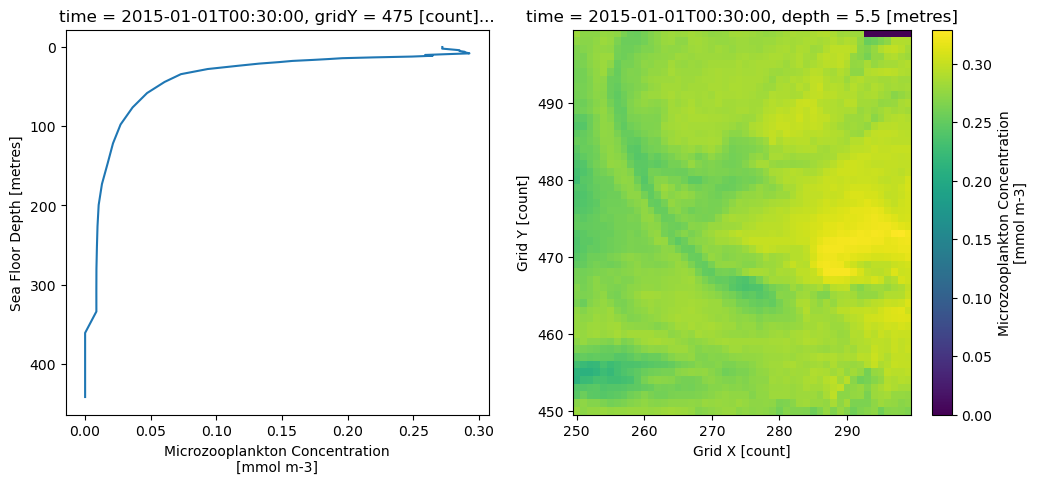

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
time_series.microzooplankton[0, :, 25, 25].plot(ax=axs[0], y='depth', yincrease=False);
time_series.microzooplankton[0, 5, :, :].plot(ax=axs[1]);

In [225]:
variance = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_month_variance_zoo_20150101_20150131.nc')
variance

<xarray.Dataset>
Dimensions:           (time: 1, depth: 40, gridY: 50, gridX: 50)
Coordinates:
  * depth             (depth) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
  * gridY             (gridY) int64 450 451 452 453 454 ... 495 496 497 498 499
  * gridX             (gridX) int64 250 251 252 253 254 ... 295 296 297 298 299
  * time              (time) datetime64[ns] 2015-01-15T12:00:00
Data variables:
    nitrate           (time, depth, gridY, gridX) float32 ...
    microzooplankton  (time, depth, gridY, gridX) float32 ...
    longitude         (time, gridY, gridX) float32 ...
    latitude          (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_month_variance_zoo__20150101_20150131
    description:  Month-variance of Z1 biomass and nitrate extracted from Sal...
    history:      2025-07-14 10:56 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

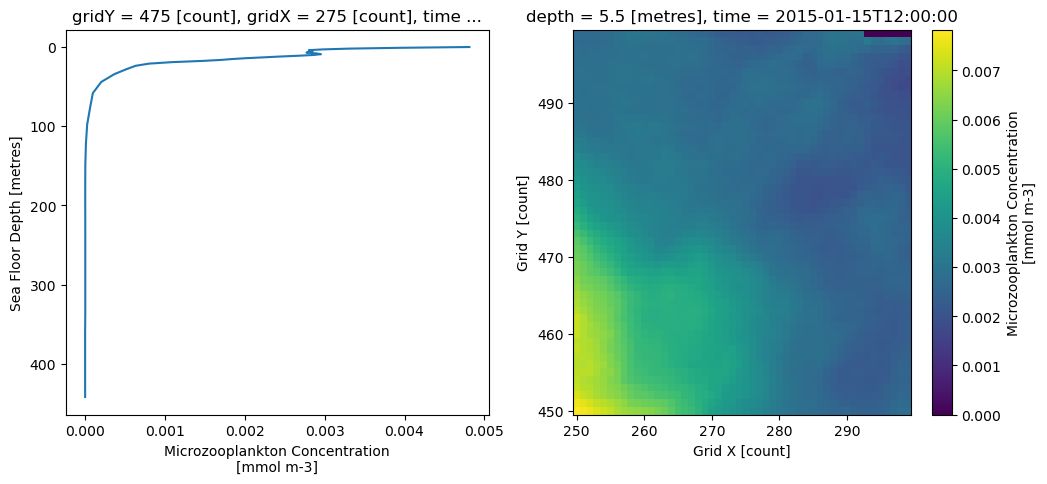

In [226]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
variance.microzooplankton[0, :, 25, 25].plot(ax=axs[0], y='depth', yincrease=False);
variance.microzooplankton[0, 5, :, :].plot(ax=axs[1]);
mypty, myptx = variance.gridY[25].values, variance.gridX[25].values;

In [203]:
depth_sum_mean = mesh.gdepw_0[0, :, mypty, myptx] * biol_mean.microzooplankton[0, :, mypty, myptx]

In [211]:
depth_mean_ts = time_series.microzooplankton[:, :, 25, 25].mean(axis=0) * mesh.gdepw_0[0, :, mypty, myptx]

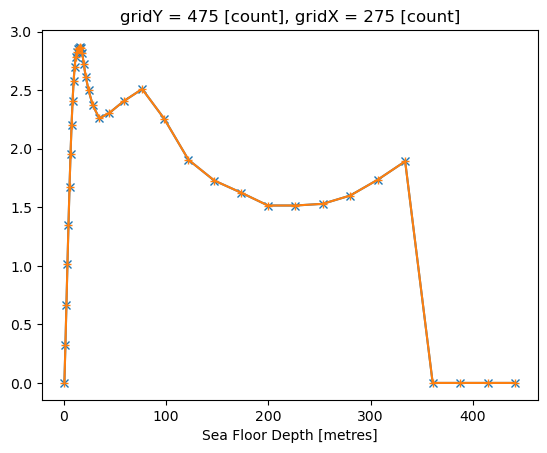

In [212]:
depth_sum_mean.plot(marker='x')
depth_mean_ts.plot(marker='+')

In [227]:
depth_sum_variance = mesh.gdepw_0[0, :, mypty, myptx] * variance.microzooplankton[0, :, 25, 25]

In [228]:
depth_variance_ts = time_series.microzooplankton[:, :, 25, 25].var(axis=0) * mesh.gdepw_0[0, :, mypty, myptx]

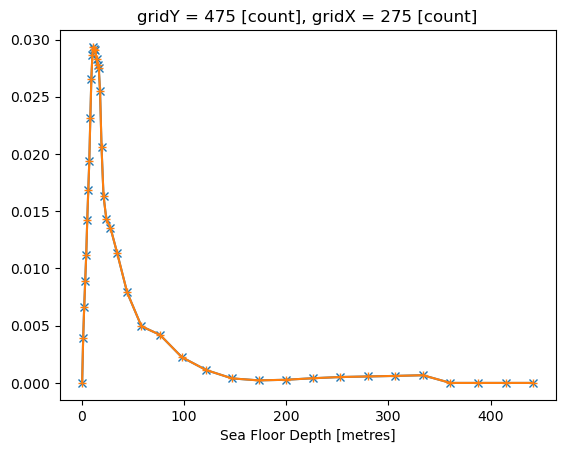

In [229]:
depth_sum_variance.plot(marker='x')
depth_variance_ts.plot(marker='+');

### That was the trivial part now for the spatial and temporal ###

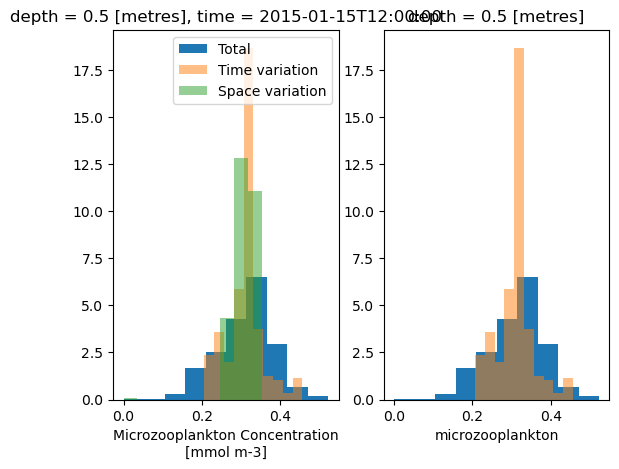

In [232]:
fig, axs = plt.subplots(1, 2)
for ax in axs:
    time_series.microzooplankton[:, 0].plot(ax=ax, density=True, label='Total');  # total distribution
    time_series.microzooplankton[:, 0].mean(axis=2).mean(axis=1).plot.hist(ax=ax, density=True, alpha=0.5, label='Time variation'); # variation in the space means across time
    
biol_mean.microzooplankton[0, 0, 450:500, 250:300].plot.hist(ax=axs[0], density=True, alpha=0.5, label='Space variation'); # variation in the temporal means across space
axs[0].legend();

In [265]:
zvars =  time_series.microzooplankton[:, 0].values.var() # total variance
var_through_time = time_series.microzooplankton[:, 0].var(dim='time')  # variance through time
mean_var_through_time = var_through_time.mean()
time_means = time_series.microzooplankton[:, 0].mean(dim='time')
variance_time_means = time_means.values.var()

In [266]:
print (f'total variance = {zvars}')
print (f'time variance = {mean_var_through_time.values}') # variance in time, averaged over space
print (f'time variance (from file) = {variance.microzooplankton[0, 0, :, :].mean().values}') # variance in time, averaged over space
print (f'space variance = {variance_time_means}') # averaged over time, variance over space
print (f'space variance (from month file) = {biol_mean.microzooplankton[0, 0, 450:500, 250:300].values.flatten().var()}') # variance in space, averaged over time
print (f'total variance as sum = {(mean_var_through_time.values + variance_time_means)}')

total variance = 0.005182940978556871
time variance = 0.004234034568071365
time variance (from file) = 0.004234034568071365
space variance = 0.0009489055373705924
space variance (from month file) = 0.0009489054791629314
total variance as sum = 0.005182940047234297


### Awesome, without the sums. ###
Now with the sums

In [314]:
zooplankton_sum = (time_series.microzooplankton[:, :] * mesh.e3w_0[0, :, 450:500, 250:300]).sum(dim='depth')

In [315]:
zvars = zooplankton_sum.var() # total variance of sum
var_through_time = zooplankton_sum.var(dim='time')  # variance through time
mean_var_through_time = var_through_time.mean()
time_means = zooplankton_sum.mean(dim='time')
variance_time_means = time_means.var()

In [316]:
print (f'total variance = {zvars.values}')
print (f'time variance, from time series = {mean_var_through_time.values}') # variance in time, averaged over space
print (f'space variance, from time series = {variance_time_means.values}') # averaged over time, variance over space
print (f'total variance as sum = {(mean_var_through_time.values + variance_time_means).values}')

total variance = 2.2369706016113193
time variance, from time series = 1.1447457482556473
space variance, from time series = 1.0922248533556724
total variance as sum = 2.2369706016113198


### Now Based on the Files I will have ###

In [317]:
file_mean_var_through_time = (variance.microzooplankton * mesh.e3w_0[0, :, 450:500, 250:300]**2).sum(dim='depth').mean()
print (f'time variance, from time series = {mean_var_through_time.values}') # variance in time, averaged over space
print (f'time variance, from variance file = {file_mean_var_through_time.values}')

time variance, from time series = 1.1447457482556473
time variance, from variance file = 0.17302309494891832


Crap!

In [318]:
print (((biol_mean.microzooplankton[0, :, mypty, myptx] * mesh.e3w_0[0, :, mypty, myptx]).var(dim='depth')).values)
print (((variance.microzooplankton[0, :, 25, 25] * mesh.e3w_0[0, :, mypty, myptx]).sum(dim='depth')).values)

0.0242069704657382
0.0651734277091991


In [319]:
print (zooplankton_sum[:, 25, 25].var().values)

0.9873889686570912


In [320]:
zooplankton_sum

<xarray.DataArray (time: 744, gridY: 50, gridX: 50)>
array([[[10.70214196, 10.6388694 , 10.90133634, ..., 11.01765088,
         11.1409438 , 11.3083815 ],
        [10.5501288 , 10.59138738, 10.8271902 , ..., 11.16503341,
         11.02930122, 11.13933864],
        [10.36439898, 10.46499293, 10.64554504, ..., 11.39099679,
         11.21945799, 11.12971756],
        ...,
        [10.59432819, 10.57732956, 10.61748259, ...,  5.01681063,
          4.01555364,  4.38731618],
        [10.47381771, 10.59776506, 10.79532417, ...,  3.50848907,
          2.46364296,  3.47705605],
        [10.24101872, 10.66509468, 10.90569128, ...,  0.        ,
          0.        ,  0.        ]],

       [[10.64701069, 10.60600566, 10.84735277, ..., 11.29788103,
         11.36866226, 11.44284216],
        [10.55209131, 10.5031689 , 10.67033679, ..., 11.43344238,
         11.3255147 , 11.45995528],
        [10.38227905, 10.34963998, 10.47789309, ..., 11.60271128,
         11.43354296, 11.40002116],
...
        [ 9.90117022,  9.61715411,  9.51202651, ...,  5.03452023,
          4.36349949,  4.54410342],
        [ 9.77244165,  9.68131428,  9.63896089, ...,  4.0712109 ,
          3.17566266,  3.77851985],
        [ 9.54748956,  9.70340279,  9.58278817, ...,  0.        ,
          0.        ,  0.        ]],

       [[13.13248424, 13.01863855, 13.11586968, ..., 12.14809162,
         12.50965177, 12.91257628],
        [13.10903803, 13.20973368, 13.39150879, ..., 12.10552516,
         12.30987097, 12.66438165],
        [12.91106284, 13.0408985 , 13.29114018, ..., 12.02230909,
         12.14798779, 12.42299534],
        ...,
        [ 9.49201735,  9.34057914,  9.15859056, ...,  5.05309087,
          4.4949444 ,  4.66727504],
        [ 9.30893755,  9.34455831,  9.29868331, ...,  4.02030645,
          3.14291641,  3.97803204],
        [ 9.15307316,  9.49652062,  9.57151875, ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-31T23:30:00
  * gridY    (gridY) int64 450 451 452 453 454 455 ... 494 495 496 497 498 499
  * gridX    (gridX) int64 250 251 252 253 254 255 ... 294 295 296 297 298 299

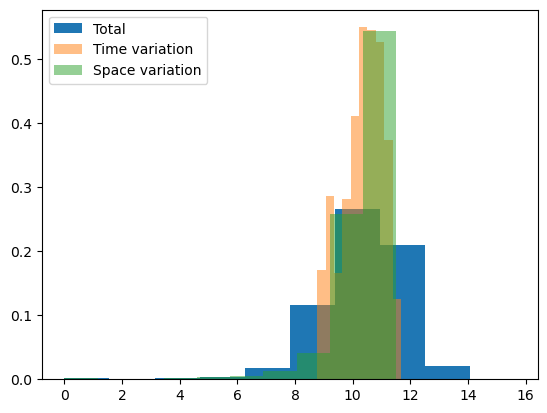

In [321]:
fig, ax = plt.subplots(1, 1)

zooplankton_sum.plot(ax=ax, density=True, label='Total');  # total distribution
zooplankton_sum.mean(dim='gridX').mean(dim='gridY').plot.hist(ax=ax, density=True, alpha=0.5, label='Time variation'); # variation in the space means across time
    
zooplankton_sum.mean(dim='time').plot.hist(ax=ax, density=True, alpha=0.5, label='Space variation'); # variation in the temporal means across space
ax.legend();

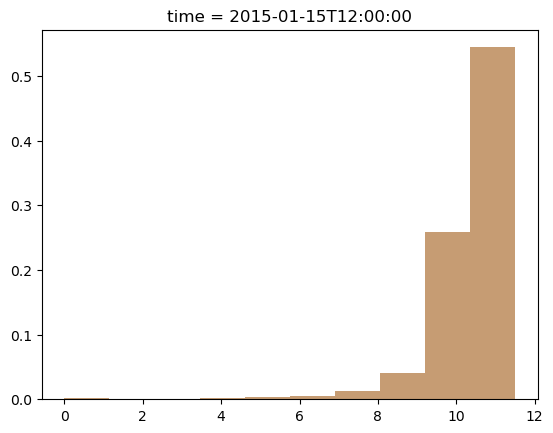

In [322]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Space Variation')
zooplankton_sum.mean(dim='time').plot.hist(ax=ax, density=True, alpha=0.5, label='from Time Series'); # variation in the temporal means across space
(biol_mean.microzooplankton[0, :, 450:500, 250:300] * mesh.e3w_0[0, :, 450:500, 250:300]).sum(dim='depth').plot.hist(
    ax=ax, density=True, alpha=0.5, label='from File');

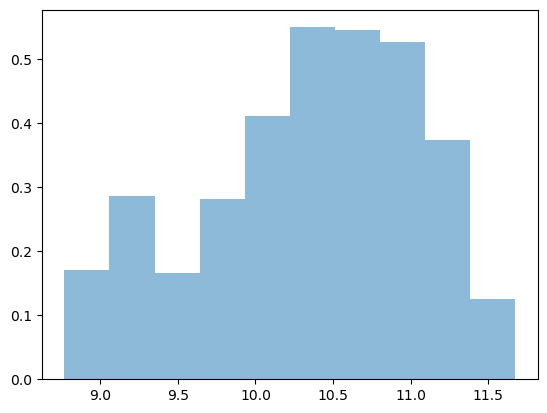

In [323]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Time Variation')
zooplankton_sum.mean(dim='gridX').mean(dim='gridY').plot.hist(ax=ax, density=True, alpha=0.5, label='From time Series'); # variation in the space means across time


In [326]:
values_over_time = ( ( biol_mean.microzooplankton[0, 0] + np.sqrt(variance.microzooplankton[0, 0]) )* 
mesh.e3w_0[0, 0, 450:500, 250:300] )
values_under_time = ( ( biol_mean.microzooplankton[0, 0] - np.sqrt(variance.microzooplankton[0, 0]) ) *
                      mesh.e3w_0[0, 0, 450:500, 250:300] )                      

In [327]:
values_over_time.mean().values

array(0.37352986)

In [328]:
values_under_time.mean().values

array(0.24590231)

<xarray.DataArray ()>
array(0.01211422)
Coordinates:
    gridY    int64 475
    gridX    int64 275
    time     datetime64[ns] 2015-01-15T12:00:00


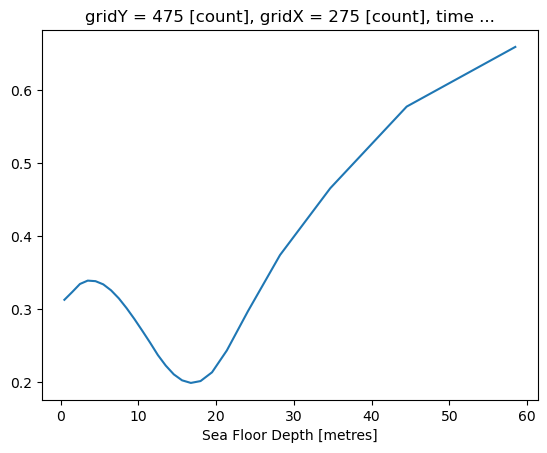

In [348]:
(biol_mean.microzooplankton[0, :25, mypty, myptx] * mesh.e3w_0[0, :25, mypty, myptx]).plot()
print ( (biol_mean.microzooplankton[0, :25, mypty, myptx] * mesh.e3w_0[0, :25, mypty, myptx]).var())

<xarray.DataArray ()>
array(0.06465808)
Coordinates:
    gridY    int64 475
    gridX    int64 275
    time     datetime64[ns] 2015-01-15T12:00:00


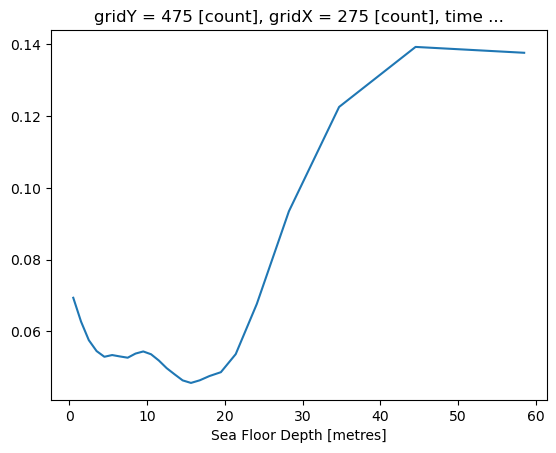

In [347]:
(np.sqrt(variance.microzooplankton[0, :25, 25, 25]) * mesh.e3w_0[0, :25, mypty, myptx]).plot()
print ((np.sqrt(variance.microzooplankton[0, :25, 25, 25]) * mesh.e3w_0[0, :25, mypty, myptx]).mean())

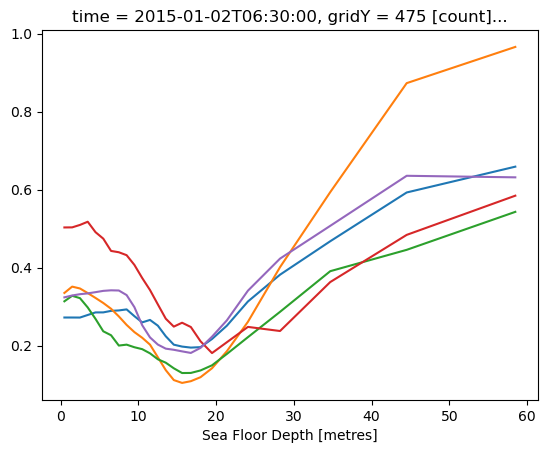

In [351]:
(time_series.microzooplankton[0, :25, 25, 25] * mesh.e3w_0[0, :25, mypty, myptx]).plot()
(time_series.microzooplankton[250, :25, 25, 25] * mesh.e3w_0[0, :25, mypty, myptx]).plot()
(time_series.microzooplankton[500, :25, 25, 25] * mesh.e3w_0[0, :25, mypty, myptx]).plot()
(time_series.microzooplankton[740, :25, 25, 25] * mesh.e3w_0[0, :25, mypty, myptx]).plot()
(time_series.microzooplankton[30, :25, 25, 25] * mesh.e3w_0[0, :25, mypty, myptx]).plot()

https://math.stackexchange.com/questions/2867951/formula-of-combined-variance-of-two-data-sets-yields-wrong-output

In [354]:
overall_mean = (mesh.e3w_0[0, 0, mypty, myptx] * biol_mean.microzooplankton[0, 0, mypty, myptx] +
                mesh.e3w_0[0, 24, mypty, myptx] * biol_mean.microzooplankton[0, 24, mypty, myptx]) / (
    mesh.e3w_0[0, 0, mypty, myptx] + mesh.e3w_0[0, 24, mypty, myptx])
print (overall_mean)

<xarray.DataArray ()>
array(0.06493231)
Coordinates:
    gridY    int64 475
    gridX    int64 275
    time     datetime64[ns] 2015-01-15T12:00:00


In [364]:
A = (mesh.e3w_0[0, 0, mypty, myptx] * variance.microzooplankton[0, 0, 25, 25]
+ mesh.e3w_0[0, 24, mypty, myptx] * variance.microzooplankton[0, 24, 25, 25]
)


In [365]:
B = (mesh.e3w_0[0, 0, mypty, myptx] * (biol_mean.microzooplankton[0, 0, mypty, myptx] -
                                  overall_mean)**2
 + mesh.e3w_0[0, 24, mypty, myptx] * (biol_mean.microzooplankton[0, 24, mypty, myptx] -
                                  overall_mean)**2
)

In [397]:
try1 = (A + B)/((mesh.e3w_0[0, 0, mypty, myptx] + mesh.e3w_0[0, 24, mypty, myptx]))
try1

<xarray.DataArray ()>
array(0.00480374)
Coordinates:
    gridY    int64 475
    gridX    int64 275
    time     datetime64[ns] 2015-01-15T12:00:00

In [395]:
try2 = ((mesh.e3w_0[0, 0, mypty, myptx] * time_series.microzooplankton[:, 0, 25, 25] +
 mesh.e3w_0[0, 24, mypty, myptx] * time_series.microzooplankton[:, 24, 25, 25]).var() /
 (mesh.e3w_0[0, 0, mypty, myptx] + mesh.e3w_0[0, 24, mypty, myptx]))
try2

<xarray.DataArray ()>
array(0.00167492)
Coordinates:
    gridY    int64 475
    gridX    int64 275

In [378]:
print (mesh.e3w_0[0, 0, mypty, myptx].values, mesh.e3w_0[0, 24, mypty, myptx].values)

1.0 13.966608821116548


In [381]:
values = np.array([3, 4, 5, 6, 8, 1])
values.var()

4.916666666666667

In [382]:
seven_values = np.array([3, 4, 5, 6, 8, 1,3, 4, 5, 6, 8, 1,3, 4, 5, 6, 8, 1,
                         3, 4, 5, 6, 8, 1,3, 4, 5, 6, 8, 1,3, 4, 5, 6, 8, 1,3, 4, 5, 6, 8, 1])
seven_values.var()

4.916666666666667

In [383]:
seven_times = values * 7

In [385]:
seven_times.var()/49

4.916666666666666

In [390]:
(time_series.microzooplankton[:, 24, 25, 25]).var()

<xarray.DataArray 'microzooplankton' ()>
array(9.713471e-05, dtype=float32)
Coordinates:
    depth    float32 58.48
    gridY    int64 475
    gridX    int64 275

In [392]:
(mesh.e3w_0[0, 24, mypty, myptx] * time_series.microzooplankton[:, 24, 25, 25]).var()/mesh.e3w_0[0, 24, mypty, myptx]**2

<xarray.DataArray ()>
array(9.71347061e-05)
Coordinates:
    depth    float32 58.48
    gridY    int64 475
    gridX    int64 275

In [420]:
def my_var(x):
    mean = x.mean()
    var = ((x - x.mean())**2).mean()
    return var

In [517]:
value1 = np.array([5, 6, 7, 8])
my_var(value1)

1.25

In [518]:
value2 = np.array([2, 2, 4, 4])
my_var(value2)

1.0

In [519]:
values = np.array([2, 2, 4, 4, 5, 6, 7, 8])
my_var(values)

4.1875

In [520]:
(1.25 + 1 + (value1.mean() - values.mean())**2 + (value2.mean() - values.mean())**2)/2.

4.1875

In [521]:
value2_s = np.array([26, 26, 52, 52])

In [522]:
values = np.array([5, 6, 7, 8, 26, 26, 52, 52])

In [523]:
mean_value = values.mean()
mean_value

22.75

In [524]:
my_var(values)

349.1875

In [525]:
(my_var(value1) + 13**2*my_var(value2) + ( 
    (value1.mean() - values.mean())**2 + (13*value2.mean() - values.mean())**2))/2.

349.1875

In [526]:
summed = values[0:4] + values[4:8]
my_var(summed)

196.25

In [528]:
easy =(my_var(value1) + 13*13+my_var(value2))
easy

171.25

In [533]:
extra = ((value1.mean() - summed.mean()/14)**2 + (value2_s.mean() - 13*summed.mean()/14)**2)
extra

21.125

In [530]:
easy + extra

192.375

In [534]:
196.25-171.25

25.0

In [538]:
4 * my_var(summed)

785.0

In [540]:
4 * my_var(value1 + value2_s - summed.mean())

785.0

In [544]:
((value1 + value2_s - summed.mean())**2).sum()

785.0

In [545]:
(value1**2 + 2*value1*value2_s + value2_s**2 - 2 * summed * summed.mean() + summed.mean()**2).sum()

785.0

In [546]:
(value1**2 + 2*value1*value2_s + value2_s**2 -  summed.mean()**2).sum()

785.0

In [555]:
(my_var(value1) + my_var(value2_s) + 2*value1*value2_s  + value1.mean()**2 + value2_s.mean()**2 - summed.mean()**2).sum()

785.0

In [556]:
4 * (my_var(value1) + my_var(value2_s) + value1.mean()**2 + value2_s.mean()**2 - summed.mean()**2) + (2*value1*value2_s).sum()

785.0

In [560]:
(2*value1*value2_s).mean()

533.0

In [562]:
2*(value1.mean() * value2_s.mean()) 

507.0

In [570]:
#(dvalue1 + value1_mean()) * (dvalue2_s + value2_mean()).mean()
dvalue1 = value1 - value1.mean()
dvalue2 = value2_s - value2_s.mean()
(2 * dvalue1 * dvalue2).mean()

26.0

In [575]:
4 * (my_var(value1) + my_var(value2_s) + value1.mean()**2 + value2_s.mean()**2 - 
     summed.mean()**2 + 2*(value1.mean() * value2_s.mean()) + 2*(dvalue1*dvalue2).mean())

785.0

In [576]:
4 * (my_var(value1) + my_var(value2_s) + (value1.mean()+ value2_s.mean())**2 - 
     summed.mean()**2 + 2*(dvalue1*dvalue2).mean())

785.0

In [577]:
p2 = (mesh.e3w_0[0, 24, mypty, myptx] * time_series.microzooplankton[:, 24, 25, 25])
p1 = (mesh.e3w_0[0, 0, mypty, myptx] * time_series.microzooplankton[:, 0, 25, 25])

In [579]:
(p1 + p1).var().values

array(0.01924937)

In [586]:
def var_estimate(p1, p2):
    print ((p1 + p2).var().values)
    est = (p1.var() + p2.var() + (p1.mean() + p2.mean())**2 - (p1+p2).mean()**2)
    print (est.values)

In [587]:
var_estimate(p1, p2)

0.02506785700040465
0.023760036081095115


In [621]:
def var_estimateb(w1, p1, w2, p2):
    print ((w1*p1 + w2*p2).var().values)
    est = (w1**2*p1.var() + w2**2*p2.var() + (w1*p1.mean() + w2*p2.mean())**2 - (w1*p1+w2*p2).mean()**2)
    dvalue1 = w1*(p1 - p1.mean())
    dvalue2 = w2*(p2 - p2.mean())
    print (est.values, 2*(dvalue1*dvalue2).mean().values, (2*dvalue1.mean()*dvalue2.mean()).values)

In [622]:
var_estimateb(mesh.e3w_0[0, 0, mypty, myptx], time_series.microzooplankton[:, 0, 25, 25],
              mesh.e3w_0[0, 24, mypty, myptx], time_series.microzooplankton[:, 24, 25, 25],)

0.02506785700040465
0.023759988938048315 0.0013078209193086105 -9.190134065857432e-16


In [616]:
var_estimateb(mesh.e3w_0[0, 0, mypty, myptx], time_series.microzooplankton[:, 0, 25, 25],
              mesh.e3w_0[0, 1, mypty, myptx], time_series.microzooplankton[:, 1, 25, 25],)

0.016910555995608794
0.008747341674565756 0.008163237951366586


In [617]:
def var_estimatep(w, p):
    print ((w * p).sum(dim='depth').var().values)
    est = (w**2*p.var(dim='time')).sum(dim='depth') + (
        (w*p).mean(dim='time').sum(dim='depth')**2 - (w*p).sum(dim='depth').mean(dim='time')**2
    )
    dvalue1 = w*(p - p.mean(dim='time'))
    print (est.values, dvalue1)

In [618]:
var_estimatep(mesh.e3w_0[0, 0:2, mypty, myptx], time_series.microzooplankton[:, 0:2, 25, 25])

0.016910555995608794
0.008747316777977392 <xarray.DataArray (depth: 2, time: 744)>
array([[-0.0405567 , -0.03483993, -0.02870333, ...,  0.19313067,
         0.18886745,  0.19053674],
       [-0.05117127, -0.04547939, -0.0394062 , ...,  0.1831049 ,
         0.17897751,  0.18040087]])
Coordinates:
  * depth    (depth) float32 0.5 1.5
  * time     (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-31T23:30:00
    gridY    int64 475
    gridX    int64 275


In [627]:
(time_series.microzooplankton[:, 0:25, 25, 25] * mesh.e3w_0[0, 0:25, mypty, myptx]).sum(dim='depth').var(dim='time')

<xarray.DataArray ()>
array(0.64619255)
Coordinates:
    gridY    int64 475
    gridX    int64 275

In [628]:
(time_series.microzooplankton[:, 0:25, 25, 25] * mesh.e3w_0[0, 0:25, mypty, myptx]).var(dim='time').sum(dim='depth')

<xarray.DataArray ()>
array(0.12303732)
Coordinates:
    gridY    int64 475
    gridX    int64 275